<a href="https://colab.research.google.com/github/AleemRahil/AI-DS/blob/main/NobelPrizes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 87.3 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression

In [ ]:
df=pd.read_csv('nobel_prize_data.csv')
df.describe()

,year
count,962.000000
mean,1971.816008
std,33.813537
min,1901.000000
25%,1948.000000
50%,1977.000000
75%,2001.000000
max,2020.000000


In [ ]:
df.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


In [ ]:
df.shape

(962, 16)

In [ ]:
df.duplicated().value_counts()

False    962
dtype: int64

In [ ]:
df.isna().value_counts()

year   category  prize  motivation  prize_share  laureate_type  full_name  birth_date  birth_city  birth_country  birth_country_current  sex    organization_name  organization_city  organization_country  ISO  
False  False     False  False       False        False          False      False       False       False          False                  False  False              False              False                 False    698
                                                                                                                                                True               True               True                  False    153
                        True        False        False          False      False       False       False          False                  False  True               True               True                  False     68
                                                                           True        True        True           True                   Tr

In [ ]:
df.isna().sum()


year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [ ]:
col_subset = ['year','category', 'laureate_type',
              'birth_date','full_name', 'organization_name']
df.loc[df.birth_date.isna()][col_subset]


,year,category,laureate_type,birth_date,full_name,organization_name
24,1904,Peace,Organization,NaN,Institut de droit international (Institute of ...,NaN
60,1910,Peace,Organization,NaN,Bureau international permanent de la Paix (Per...,NaN
89,1917,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
200,1938,Peace,Organization,NaN,Office international Nansen pour les Réfugiés ...,NaN
215,1944,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
237,1947,Peace,Organization,NaN,American Friends Service Committee (The Quakers),NaN
238,1947,Peace,Organization,NaN,Friends Service Council (The Quakers),NaN
283,1954,Peace,Organization,NaN,Office of the United Nations High Commissioner...,NaN
348,1963,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
349,1963,Peace,Organization,NaN,Ligue des Sociétés de la Croix-Rouge (League o...,NaN


In [ ]:
col_subset = ['year','category', 'laureate_type','full_name', 'organization_name']
df.loc[df.organization_name.isna()][col_subset]

,year,category,laureate_type,full_name,organization_name
1,1901,Literature,Individual,Sully Prudhomme,NaN
3,1901,Peace,Individual,Frédéric Passy,NaN
4,1901,Peace,Individual,Jean Henry Dunant,NaN
7,1902,Literature,Individual,Christian Matthias Theodor Mommsen,NaN
9,1902,Peace,Individual,Charles Albert Gobat,NaN
...,...,...,...,...,...
932,2018,Peace,Individual,Nadia Murad,NaN
942,2019,Literature,Individual,Peter Handke,NaN
946,2019,Peace,Individual,Abiy Ahmed Ali,NaN
954,2020,Literature,Individual,Louise Glück,NaN


In [ ]:
df.birth_date = pd.to_datetime(df.birth_date)


In [ ]:
separated_values = df.prize_share.str.split('/', expand=True)
numerator = pd.to_numeric(separated_values[0])
denomenator = pd.to_numeric(separated_values[1])
df['share_pct']=numerator/denomenator

In [ ]:
df.loc[df.sex=='Female'][:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


In [ ]:
biology = df.sex.value_counts()
biology

Male      876
Female     58
Name: sex, dtype: int64

In [ ]:
fig= px.pie(labels=biology.index,
            values=biology.values,
            title="Percentage of Male vs. Female Winners",
             names=biology.index,
             hole=0.4,)
 
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')    

fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [ ]:
is_winner = df.duplicated(subset=['full_name'], keep=False)
multiple_winners = df[is_winner]
multiple_winners.full_name.nunique()

6

In [ ]:
df.category.nunique()


6

In [ ]:
prizes_per_category = df.category.value_counts()
prizes_per_category.sort_values(ascending=True, inplace=True)
prizes_per_category

Economics      86
Literature    117
Peace         135
Chemistry     186
Physics       216
Medicine      222
Name: category, dtype: int64

In [ ]:
h_bar = px.bar(
    x=prizes_per_category.values,
    y=prizes_per_category.index,
    orientation='h',
    color=prizes_per_category.values,
    color_continuous_scale='Aggrnyl',
    title='Number of Prizes Awarded per Category'
)

h_bar.update_layout(xaxis_title='Number of Prizes',
                    coloraxis_showscale=False,
                    yaxis_title='Nobel Prize Category')
h_bar.show()

In [ ]:
df[df.category=='Economics'].sort_values('year')[:1]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD


In [ ]:
cat_men_women=df.groupby(['category', 'sex'], as_index=False,).agg({'prize' : pd.Series.count})
cat_men_women.sort_values('prize', ascending=False, inplace=True)
cat_men_women

,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90
3,Economics,Male,84
8,Peace,Female,17
4,Literature,Female,16
6,Medicine,Female,12
0,Chemistry,Female,7


In [ ]:
split_h_bar = px.bar(
    x=cat_men_women.prize,
    y=cat_men_women.category,
    orientation='h',
    color=cat_men_women.sex,
    color_continuous_scale='Aggrnyl',
    title='Number of Prizes Awarded per Category split by Men and Women'
)

split_h_bar.update_layout(xaxis_title='Number of Prizes',
                    coloraxis_showscale=False,
                    yaxis_title='Nobel Prize Category')
split_h_bar.show()

In [ ]:
df.groupby('year').count()

,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
year,,,,,,,,,,,,,,,
1901,6,6,4,6,6,6,6,6,6,6,6,3,3,3,6
1902,7,7,5,7,7,7,7,7,7,7,7,4,4,4,7
1903,7,7,6,7,7,7,7,7,7,7,7,4,4,4,7
1904,6,6,5,6,6,6,5,5,5,5,5,3,3,3,5
1905,5,5,4,5,5,5,5,5,5,5,5,3,3,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,11,11,11,11,11,11,11,11,11,11,11,9,9,9,11
2017,12,12,12,12,12,12,11,11,11,11,11,10,7,7,11
2018,13,13,13,13,13,13,13,13,13,13,13,10,10,10,13


In [ ]:
prize_per_year = df.groupby(by='year').count().prize 
prize_per_year

year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2016    11
2017    12
2018    13
2019    14
2020    12
Name: prize, Length: 117, dtype: int64

In [ ]:
moving_average = prize_per_year.rolling(window=5).mean()

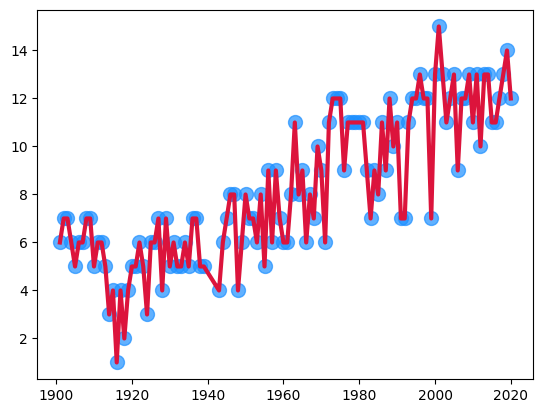

In [ ]:
plt.scatter(x=prize_per_year.index,
            y=prize_per_year.values,
            c='dodgerblue',
            alpha=0.7,
            s=100)
plt.plot(prize_per_year.index,
         prize_per_year.values,
         c='crimson',
         linewidth=3)
plt.show()

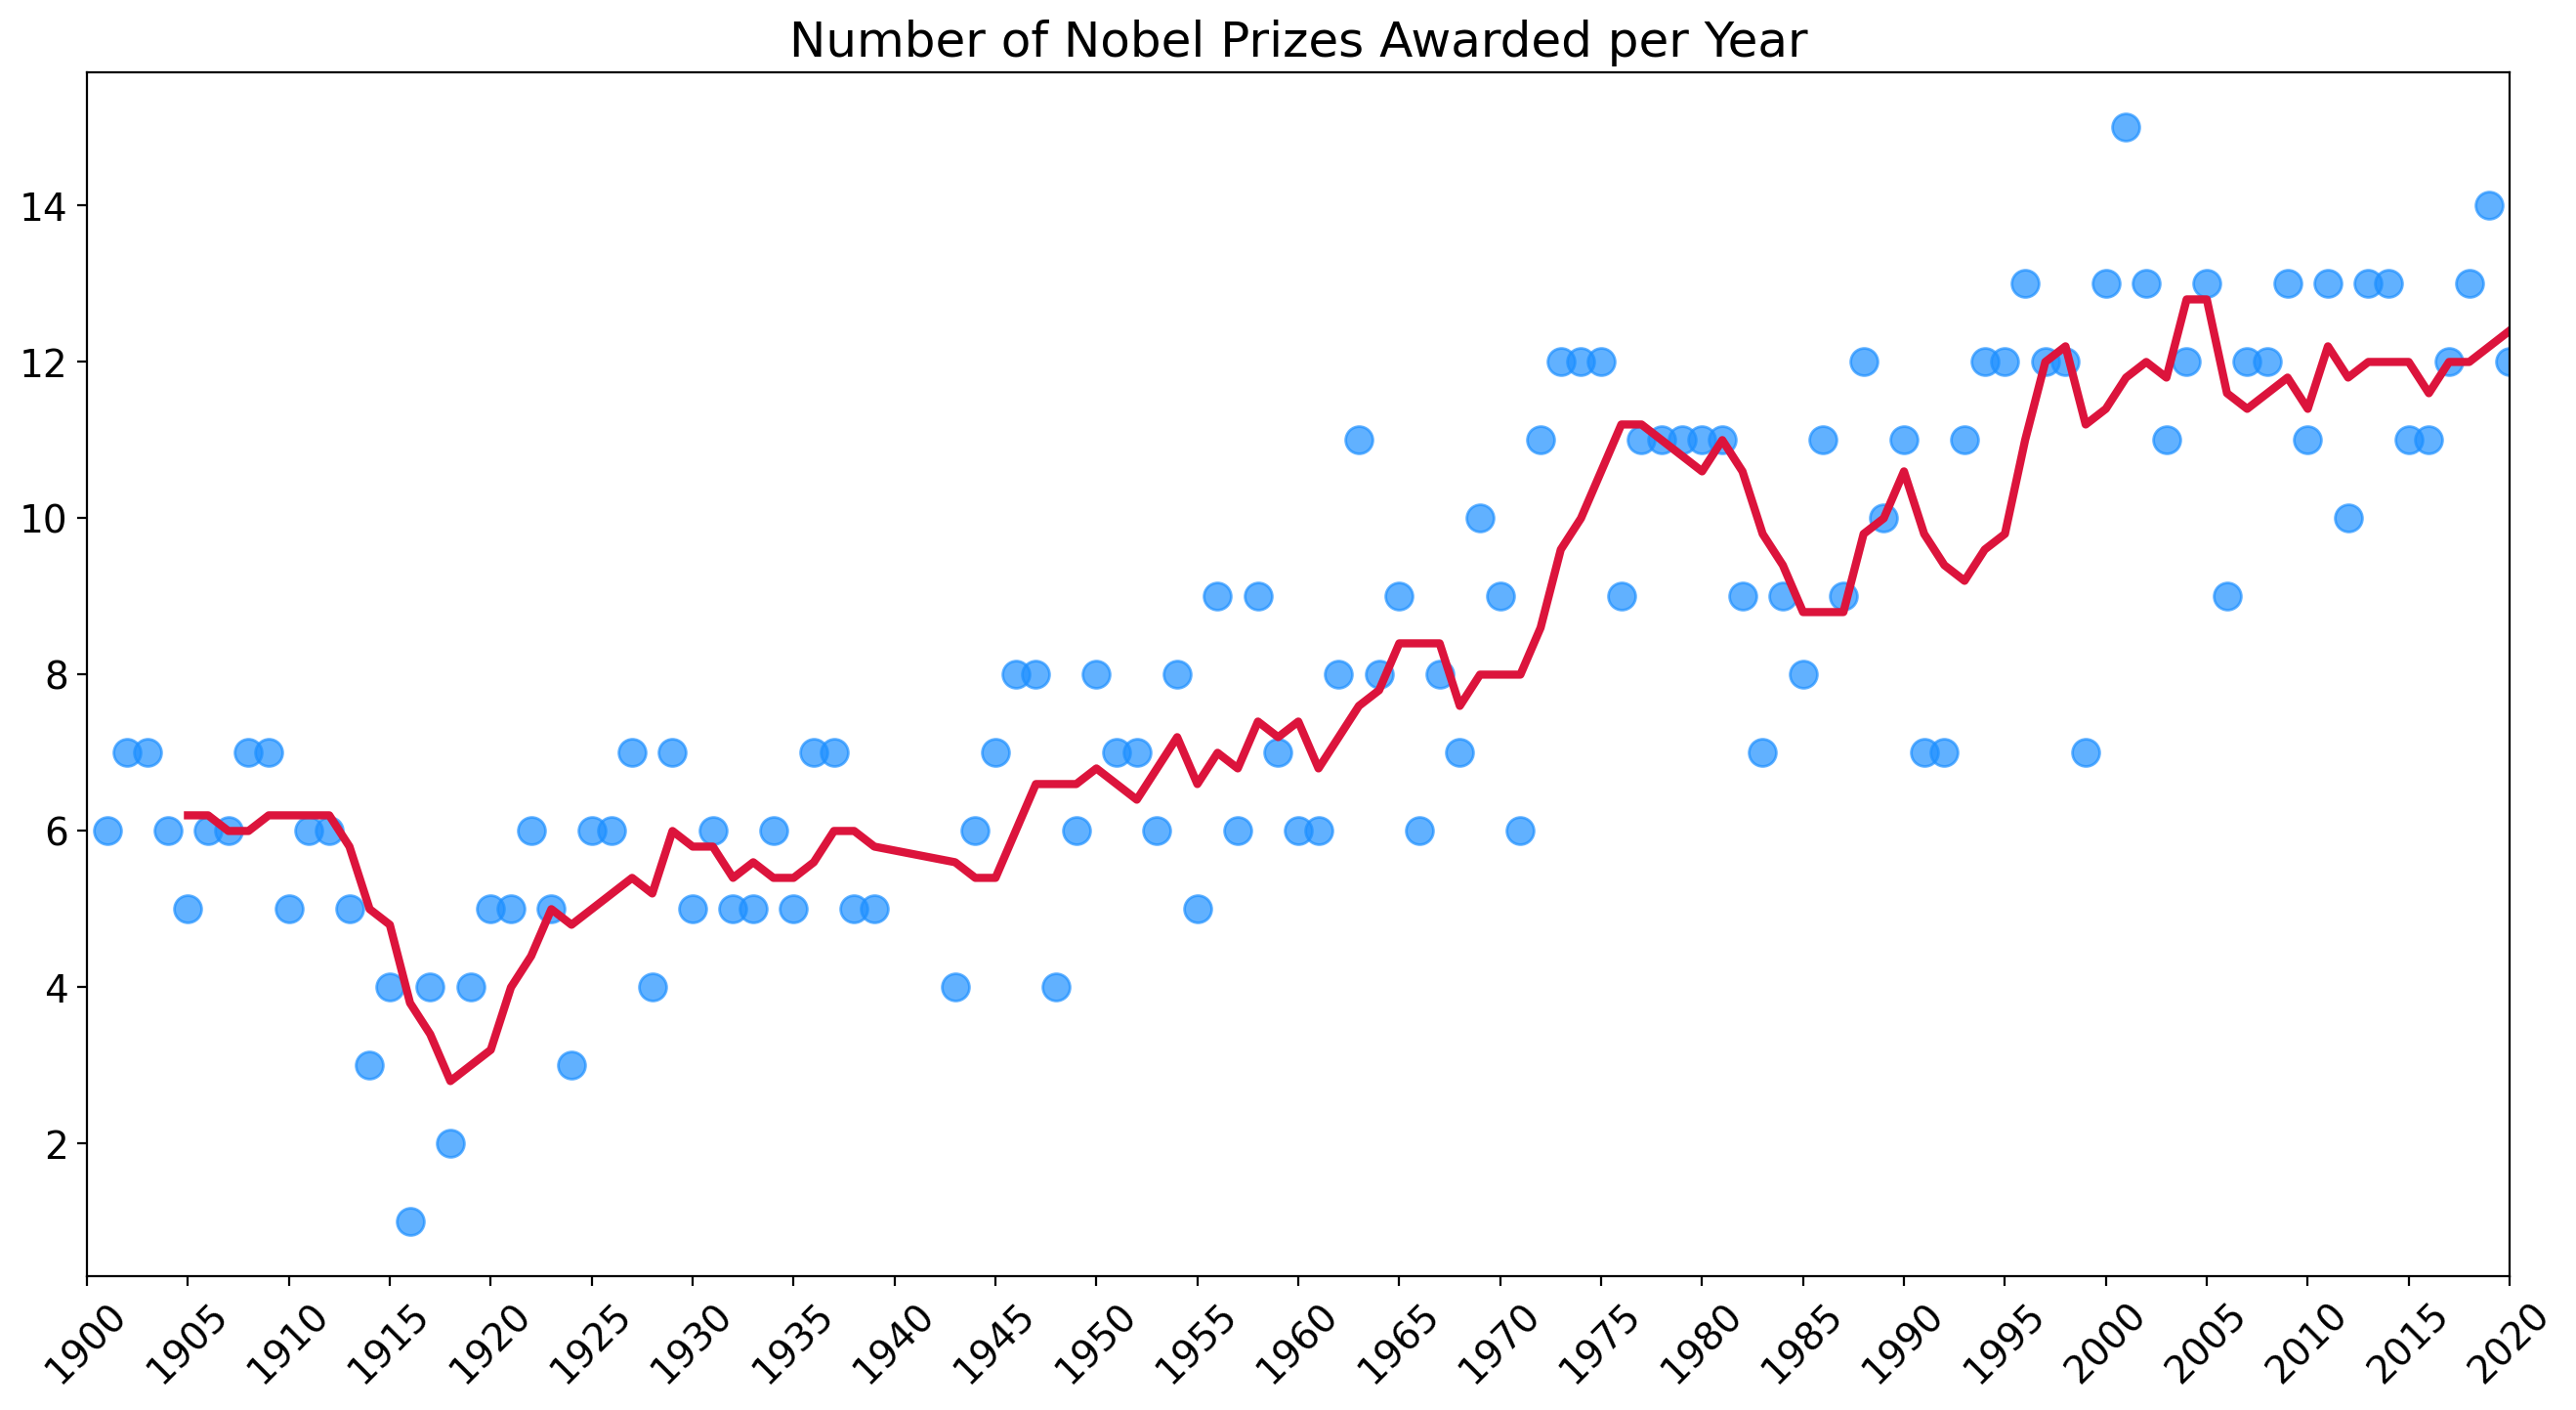

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax = plt.gca() # get current axis
ax.set_xlim(1900, 2020)
 
ax.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
plt.show()

In [ ]:
avg_prize_share_per_year = df.groupby(by='year').agg({'share_pct': pd.Series.mean}) 
avg_prize_share_per_year

,share_pct
year,
1901,0.833333
1902,0.714286
1903,0.714286
1904,0.833333
1905,1.000000
...,...
2016,0.545455
2017,0.500000
2018,0.461538


In [ ]:
share_moving_average = avg_prize_share_per_year.rolling(window=5).mean()
share_moving_average

,share_pct
year,
1901,NaN
1902,NaN
1903,NaN
1904,NaN
1905,0.819048
...,...
2016,0.522797
2017,0.502797
2018,0.502797


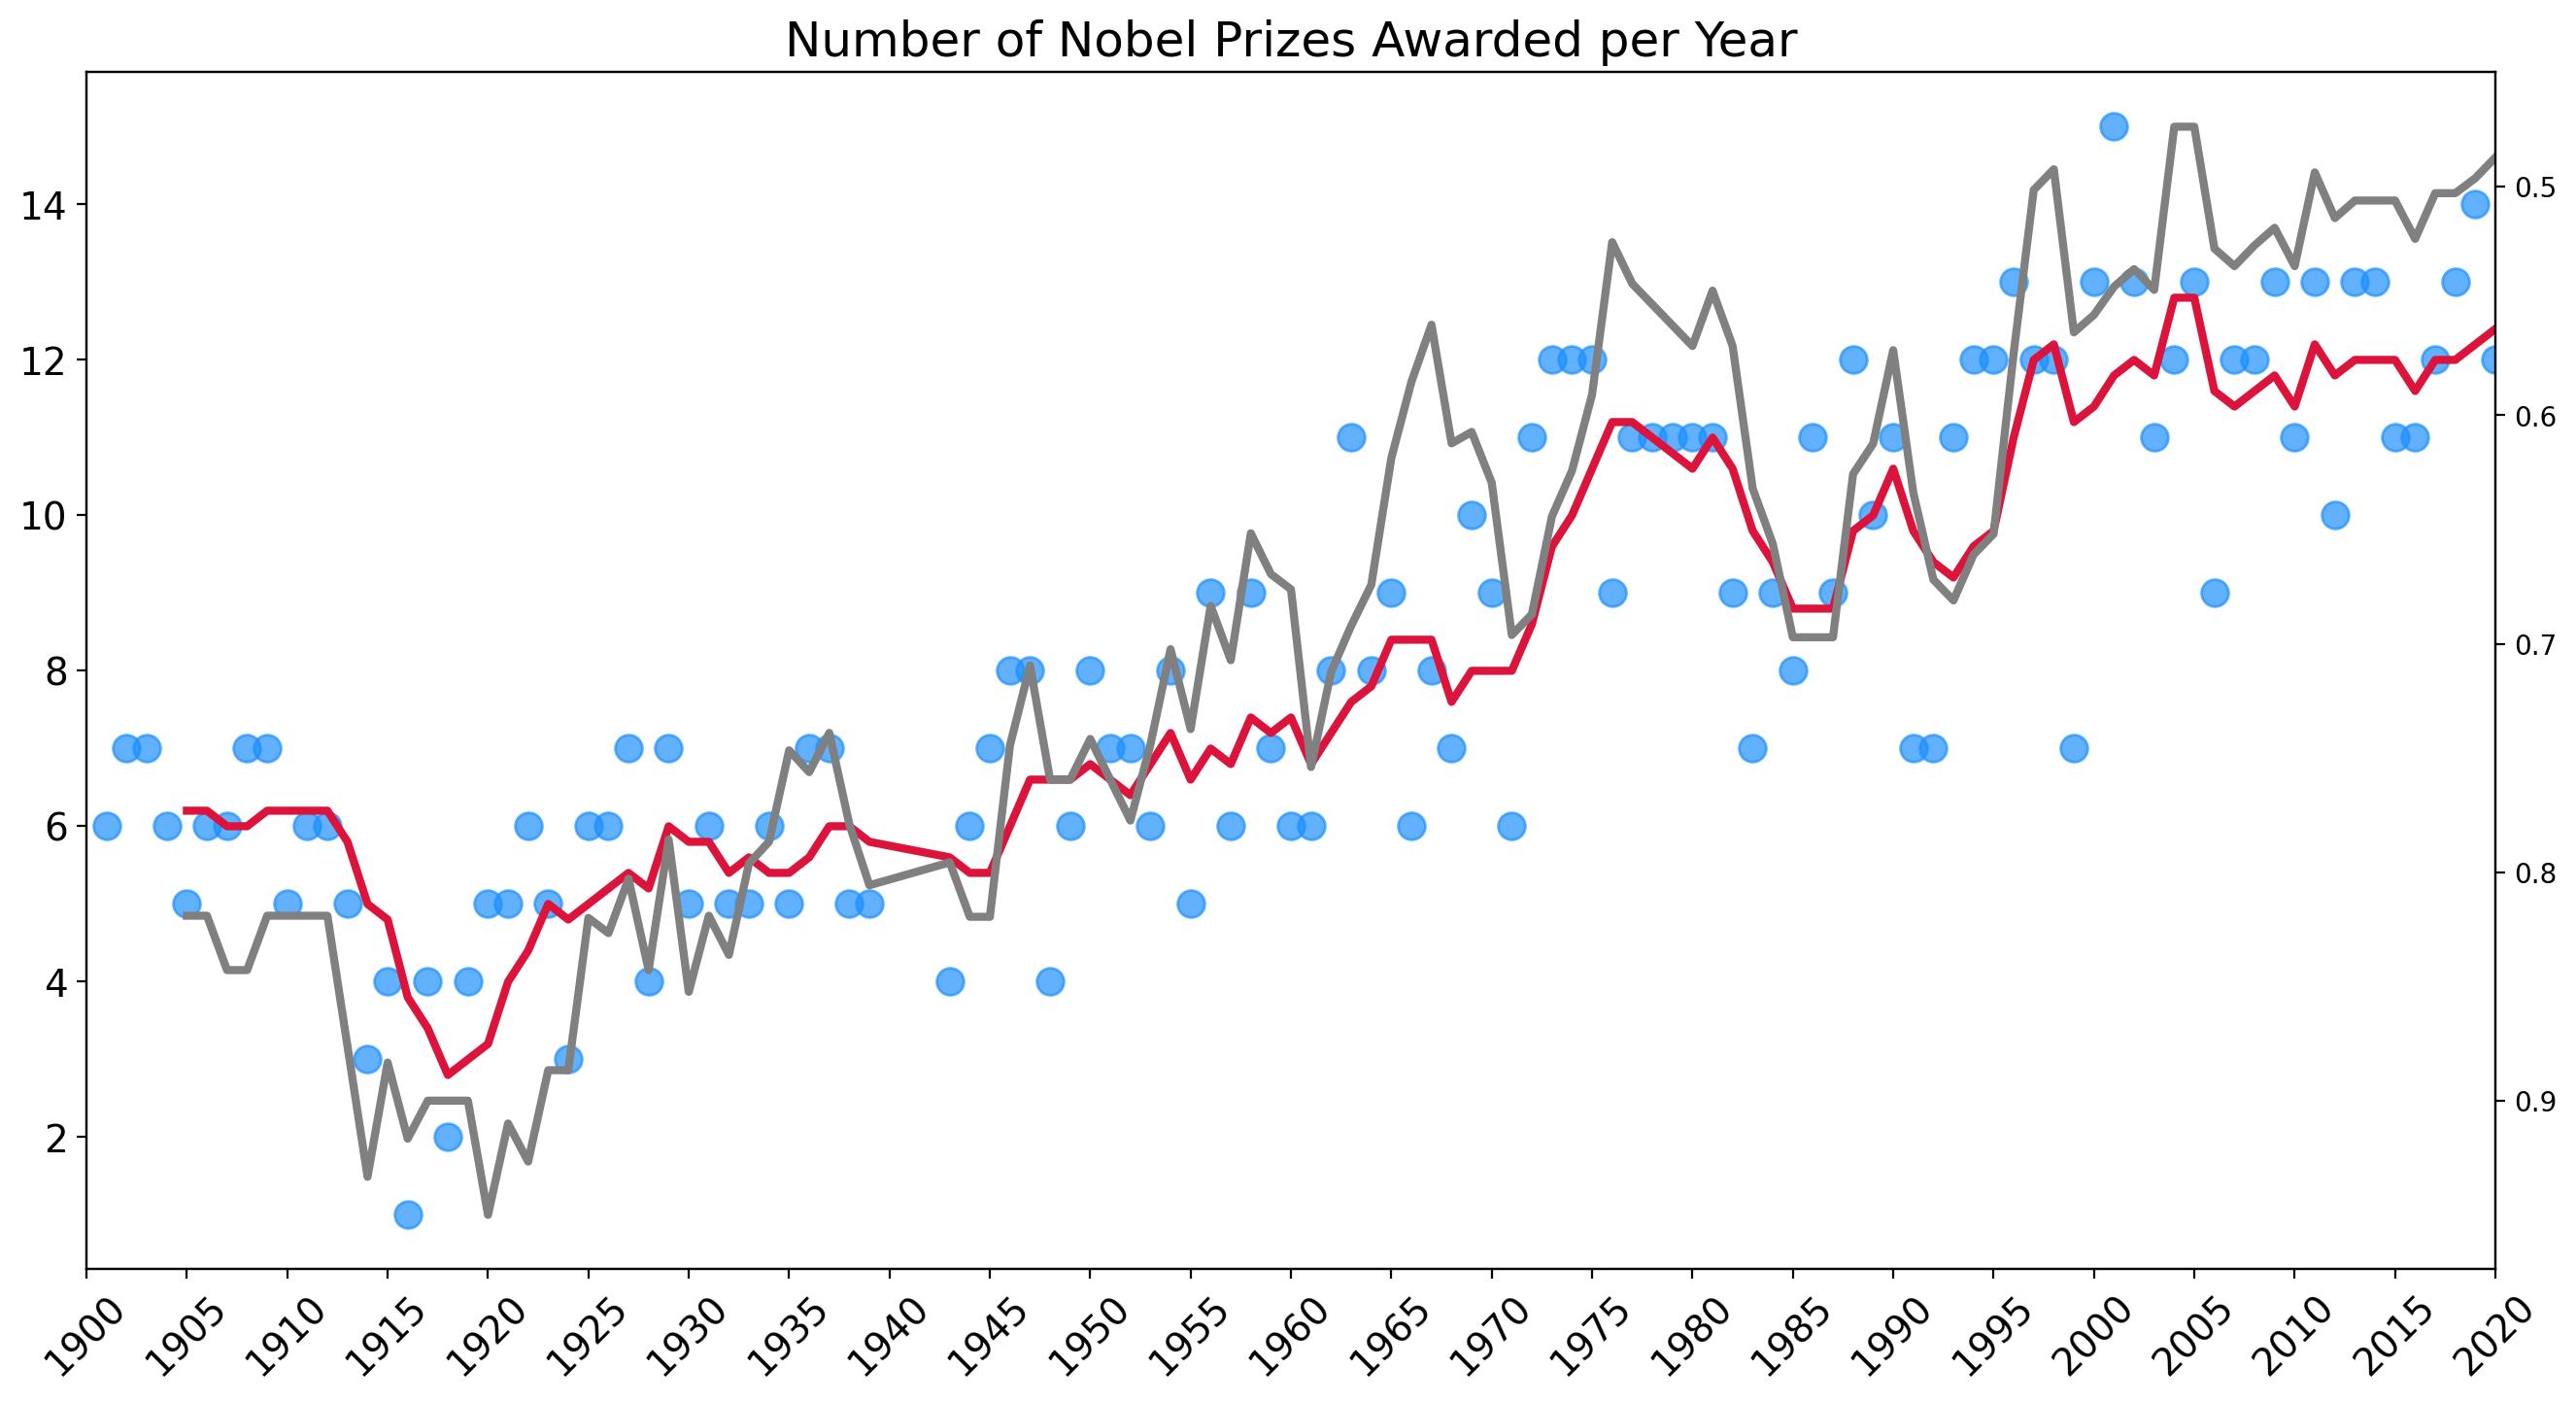

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax1 = plt.gca() # get current axis
ax2= ax1.twinx()
ax1.set_xlim(1900, 2020)
 

ax2.invert_yaxis()

ax1.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax1.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
ax2.plot(prize_per_year.index, 
        share_moving_average.values, 
        c='grey', 
        linewidth=3,)

plt.show()

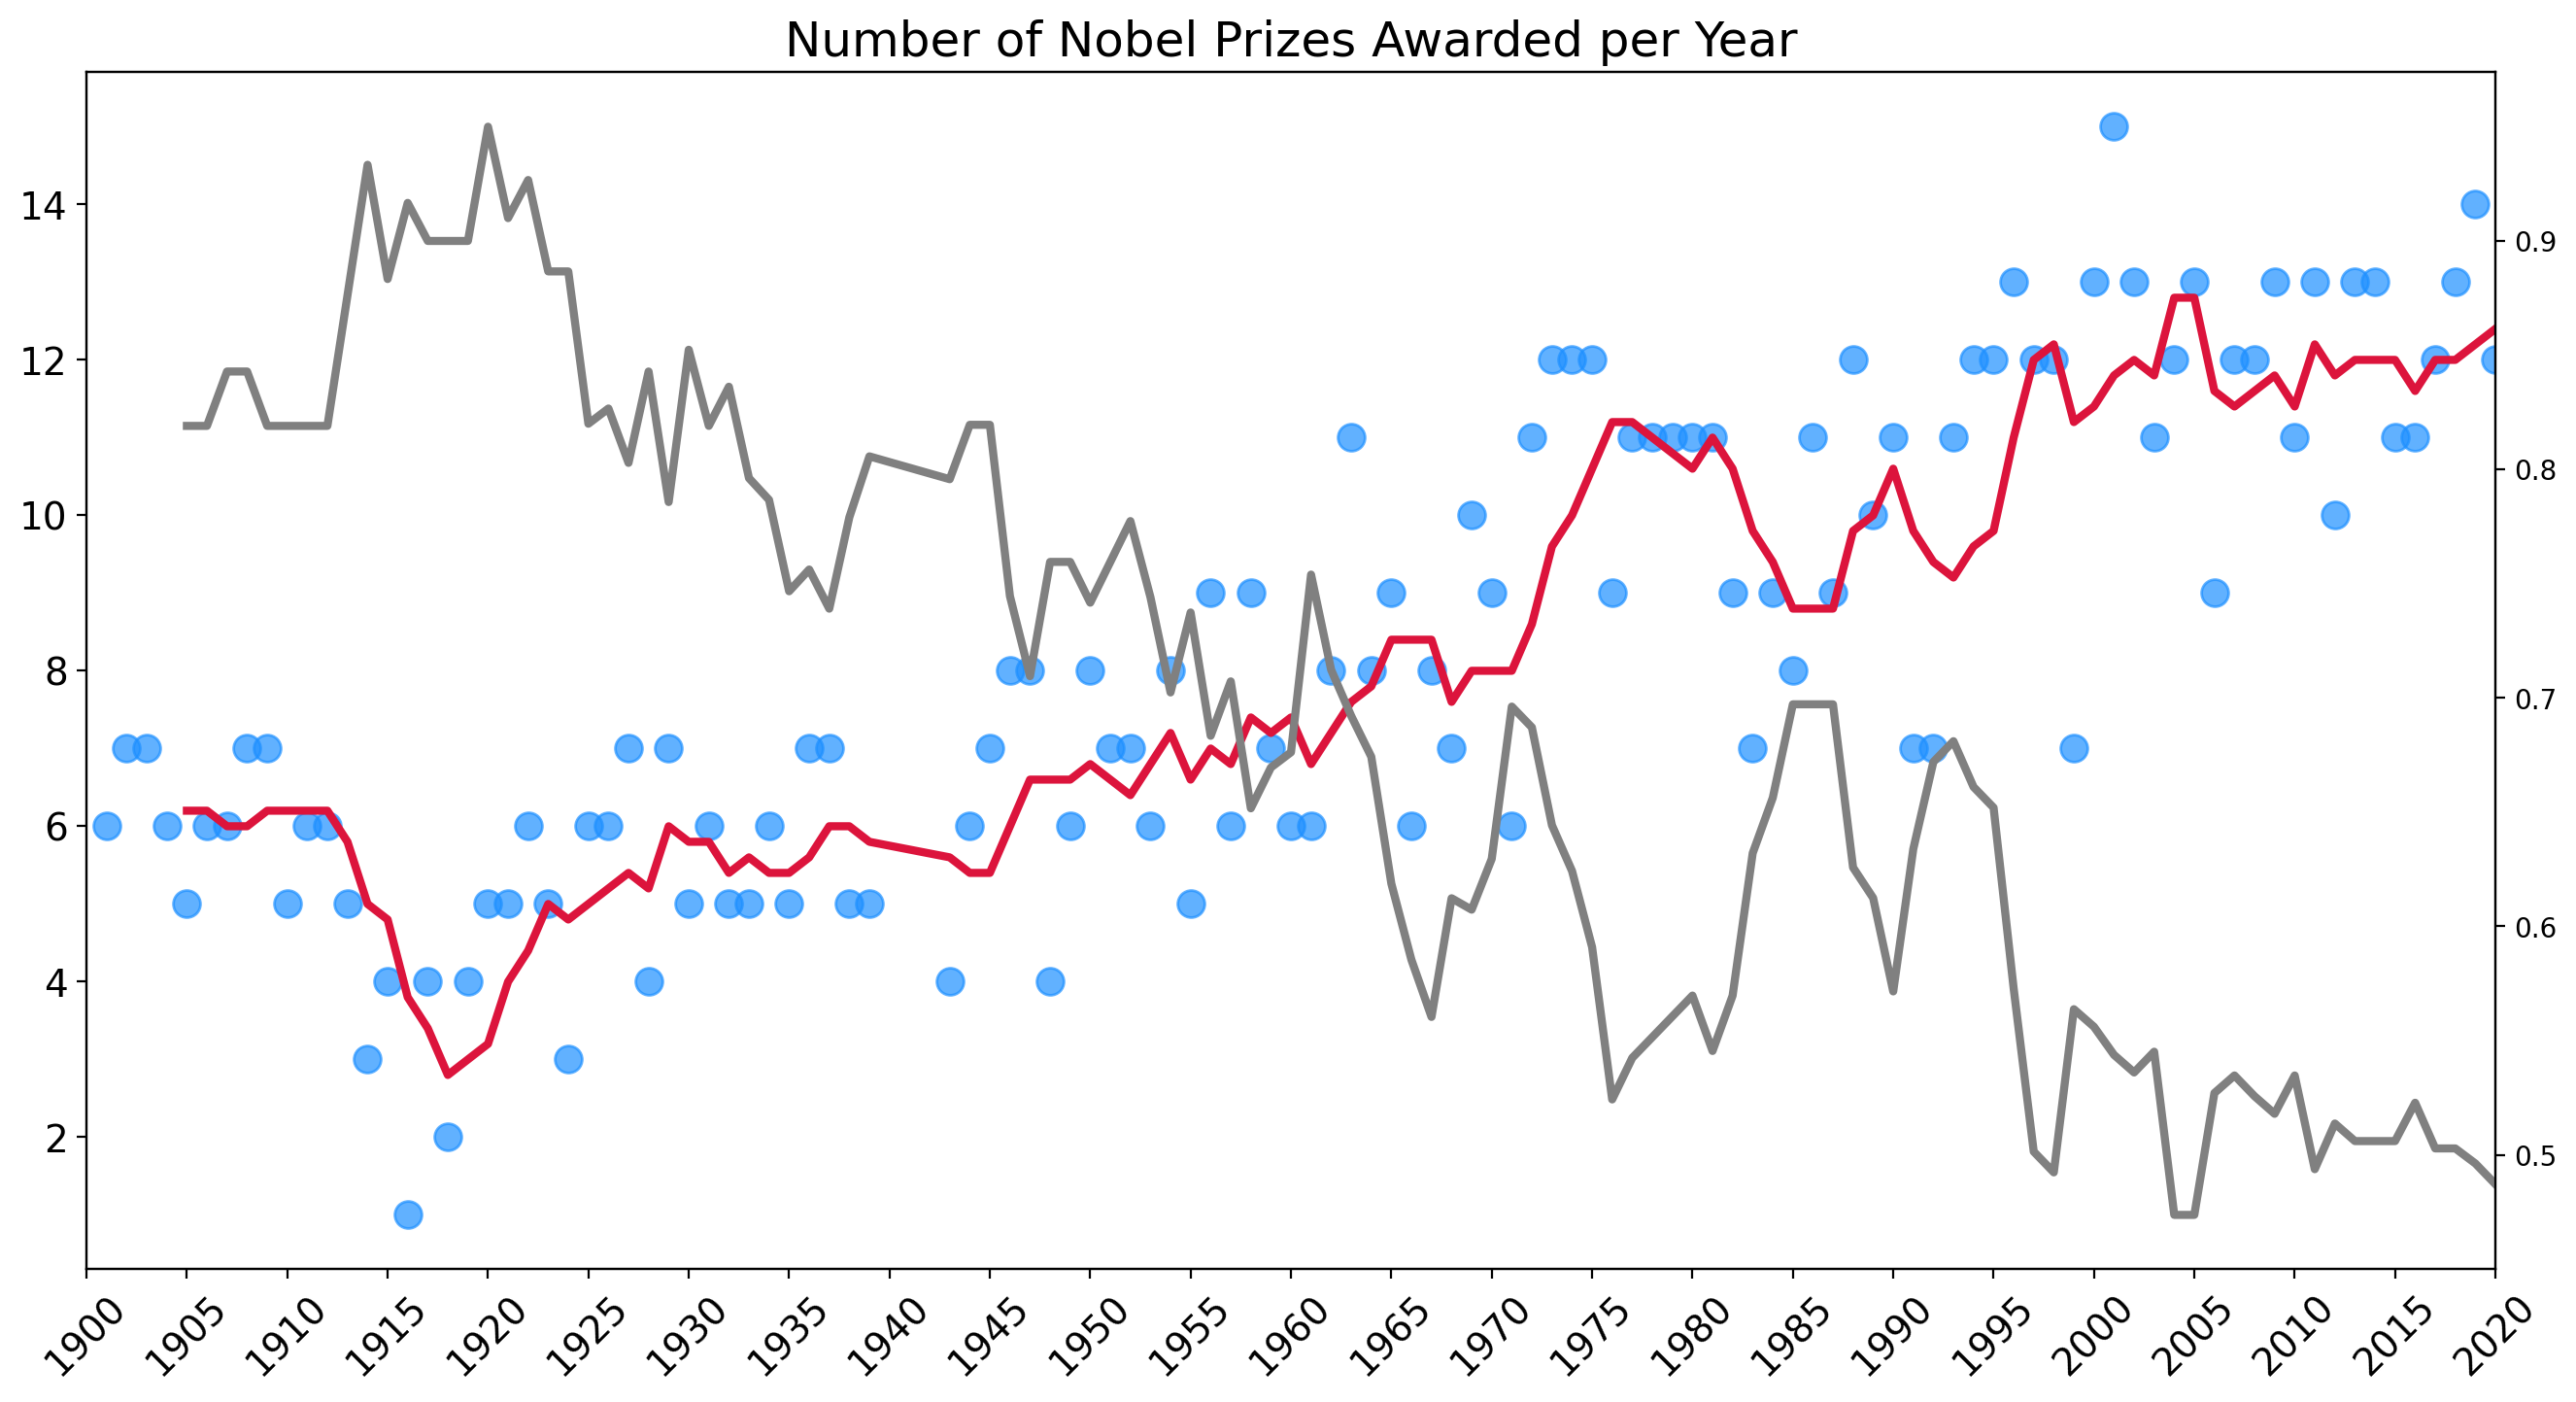

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax1 = plt.gca() # get current axis
ax2= ax1.twinx()
ax1.set_xlim(1900, 2020)
 
ax1.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax1.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
ax2.plot(prize_per_year.index, 
        share_moving_average.values, 
        c='grey', 
        linewidth=3,)

plt.show()

In [ ]:
df_countries=df.groupby(['birth_country_current', 'ISO'], as_index=False).agg({'prize': pd.Series.count})
df_countries.sort_values(by='prize', inplace=True)
top20_countries = df_countries[-20:]
top20_countries

,birth_country_current,ISO,prize
7,Belgium,BEL,9
31,Hungary,HUN,9
33,India,IND,9
2,Australia,AUS,10
20,Denmark,DNK,12
54,Norway,NOR,12
13,China,CHN,12
51,Netherlands,NLD,18
3,Austria,AUT,18
39,Italy,ITA,19


In [ ]:
new_h_bar= px.bar(x=top20_countries.prize,
                  y=top20_countries.ISO,
                  orientation='h',
                  color=top20_countries.prize,
                  color_continuous_scale='Viridis',
                  title='Top 20 Countries by Number of Prizes')

new_h_bar.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='Country',
                    coloraxis_showscale=False)
new_h_bar.show()

In [ ]:
world_map = px.choropleth(df_countries,
                          locations='ISO',
                          color='prize', 
                          hover_name='birth_country_current', 
                          color_continuous_scale=px.colors.sequential.matter)
 
world_map.update_layout(coloraxis_showscale=True,)
 
world_map.show()

In [ ]:
cat_country = df.groupby(['birth_country_current', 'category'], 
                               as_index=False).agg({'prize': pd.Series.count})
cat_country.sort_values(by='prize', ascending=False, inplace=True)

In [ ]:
merged_df = pd.merge(cat_country, top20_countries, on='birth_country_current')
# change column names
merged_df.columns = ['birth_country_current', 'ISO', 'category', 'cat_prize', 'total_prize'] 
merged_df.sort_values(by='total_prize', inplace=True)
merged_df

,birth_country_current,ISO,category,cat_prize,total_prize
109,India,Physics,1,IND,9
108,India,Peace,1,IND,9
88,Belgium,Peace,3,BEL,9
89,Belgium,Medicine,3,BEL,9
90,Belgium,Chemistry,1,BEL,9
...,...,...,...,...,...
4,United States of America,Peace,19,USA,281
3,United States of America,Economics,49,USA,281
2,United States of America,Chemistry,55,USA,281
1,United States of America,Physics,70,USA,281


In [ ]:
cat_cntry_bar = px.bar(x=merged_df.total_prize,
                       y=merged_df.cat_prize,
                       color=merged_df.ISO,
                       orientation='h',
                       title='Top 20 Countries by Number of Prizes and Category')
 
cat_cntry_bar.update_layout(xaxis_title='Number of Prizes', 
                            yaxis_title='Country')
cat_cntry_bar.show()

In [ ]:
prize_by_year = df.groupby(by=['birth_country_current', 'year'], as_index=False).count()
prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]
cumulative_prizes = prize_by_year.groupby(by=['birth_country_current',
                                              'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True)

l_chart = px.line(cumulative_prizes,
                  x='year', 
                  y='prize',
                  color='birth_country_current',
                  hover_name='birth_country_current')
 
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Prizes')
 
l_chart.show()

In [ ]:
top20_orgs = df.organization_name.value_counts()[:20]
top20_orgs.sort_values(ascending=True, inplace=True)

In [ ]:
org_bar = px.bar(x = top20_orgs.values,
                 y = top20_orgs.index,
                 orientation='h',
                 color=top20_orgs.values,
                 color_continuous_scale=px.colors.sequential.haline,
                 title='Top 20 Research Institutions by Number of Prizes')
 
org_bar.update_layout(xaxis_title='Number of Prizes', 
                      yaxis_title='Institution',
                      coloraxis_showscale=False)
org_bar.show()

In [ ]:
top20_org_cities = df.organization_city.value_counts()[:20]
top20_org_cities.sort_values(ascending=True, inplace=True)
city_bar2 = px.bar(x = top20_org_cities.values,
                  y = top20_org_cities.index,
                  orientation='h',
                  color=top20_org_cities.values,
                  color_continuous_scale=px.colors.sequential.Plasma,
                  title='Which Cities Do the Most Research?')
 
city_bar2.update_layout(xaxis_title='Number of Prizes', 
                       yaxis_title='City',
                       coloraxis_showscale=False)
city_bar2.show()

In [ ]:
top20_cities = df.birth_city.value_counts()[:20]
top20_cities.sort_values(ascending=True, inplace=True)
city_bar = px.bar(x=top20_cities.values,
                  y=top20_cities.index,
                  orientation='h',
                  color=top20_cities.values,
                  color_continuous_scale=px.colors.sequential.Plasma,
                  title='Where were the Nobel Laureates Born?')
 
city_bar.update_layout(xaxis_title='Number of Prizes', 
                       yaxis_title='City of Birth',
                       coloraxis_showscale=False)
city_bar.show()

In [ ]:
country_city_org = df.groupby(by=['organization_country', 
                                       'organization_city', 
                                       'organization_name'], as_index=False).agg({'prize': pd.Series.count})
 
country_city_org = country_city_org.sort_values('prize', ascending=False)
country_city_org

,organization_country,organization_city,organization_name,prize
205,United States of America,"Cambridge, MA",Harvard University,29
280,United States of America,"Stanford, CA",Stanford University,23
206,United States of America,"Cambridge, MA",Massachusetts Institute of Technology (MIT),21
209,United States of America,"Chicago, IL",University of Chicago,20
195,United States of America,"Berkeley, CA",University of California,19
...,...,...,...,...
110,Japan,Sapporo,Hokkaido University,1
111,Japan,Tokyo,Asahi Kasei Corporation,1
112,Japan,Tokyo,Kitasato University,1
113,Japan,Tokyo,Tokyo Institute of Technology,1


In [ ]:
burst = px.sunburst(country_city_org, 
                    path=['organization_country', 'organization_city', 'organization_name'], 
                    values='prize',
                    title='Where do Discoveries Take Place?',
                   )
 
burst.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='City',
                    coloraxis_showscale=False)
 
burst.show()

In [ ]:
birth_year=df.birth_date.dt.year
df['winning_age']=df.year-birth_year

In [ ]:
display(df.nlargest(n=1, columns='winning_age'))
display(df.nsmallest(n=1, columns='winning_age'))

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning _age,winning_age
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,0.333333,97.0,97.0


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning _age,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,0.5,17.0,17.0


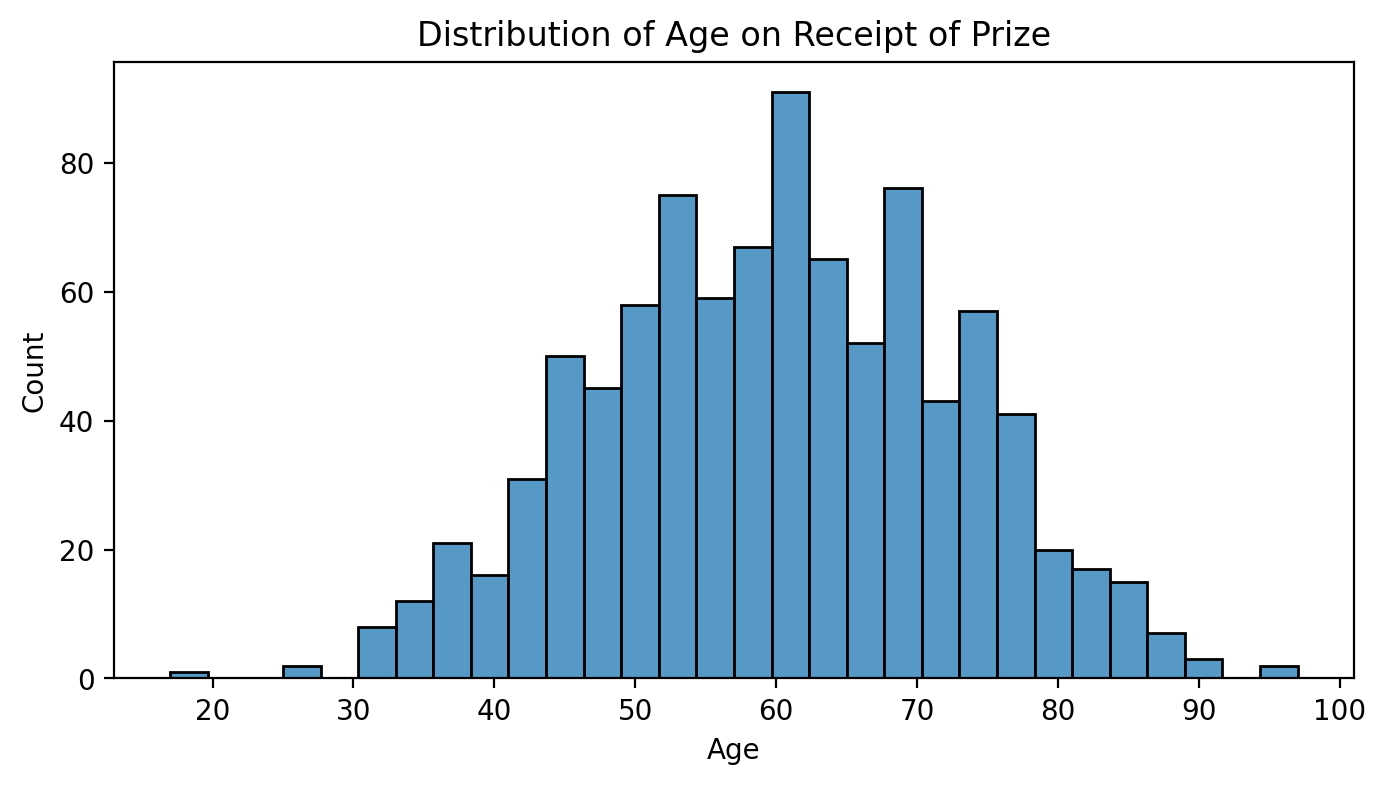

In [ ]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df,
             x=df.winning_age,
             bins=30)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

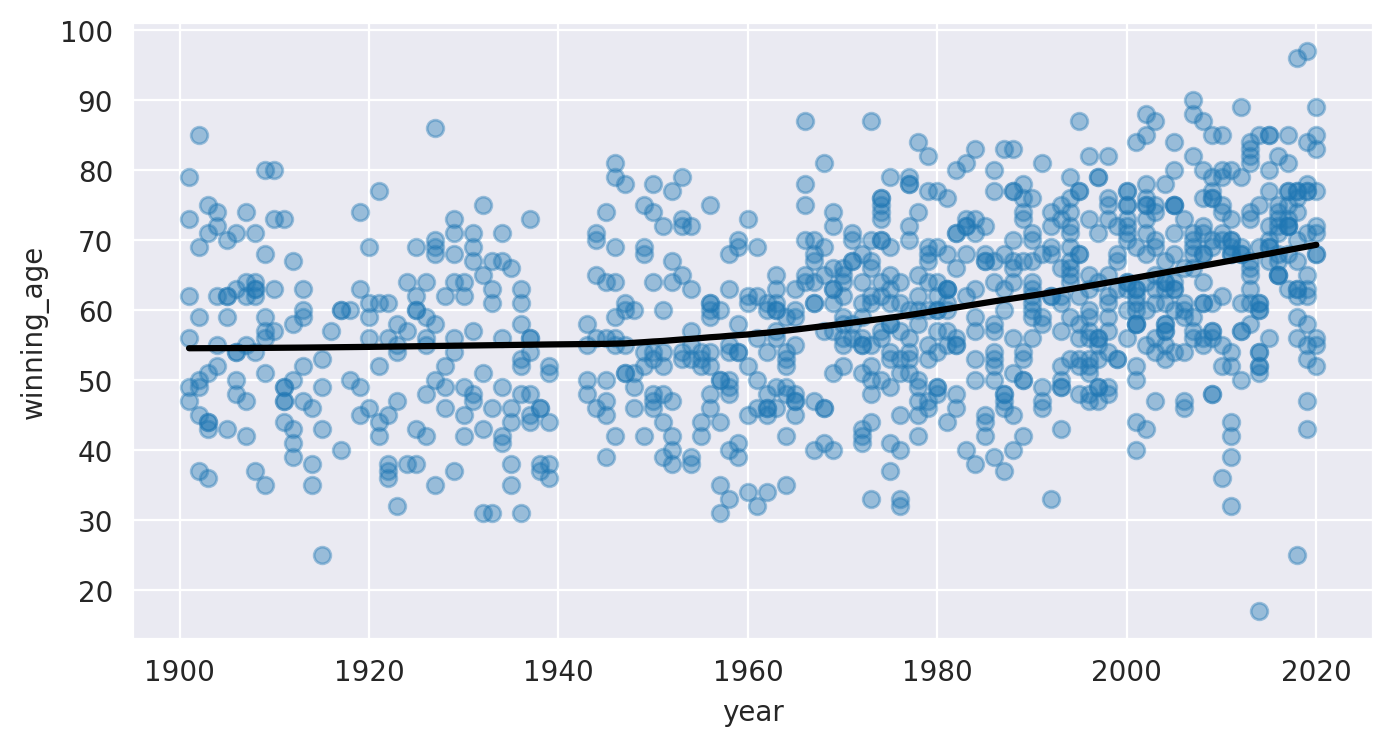

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
    sns.regplot(data=df,
                x='year',
                y='winning_age',
                lowess=True, 
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})
 
plt.show()

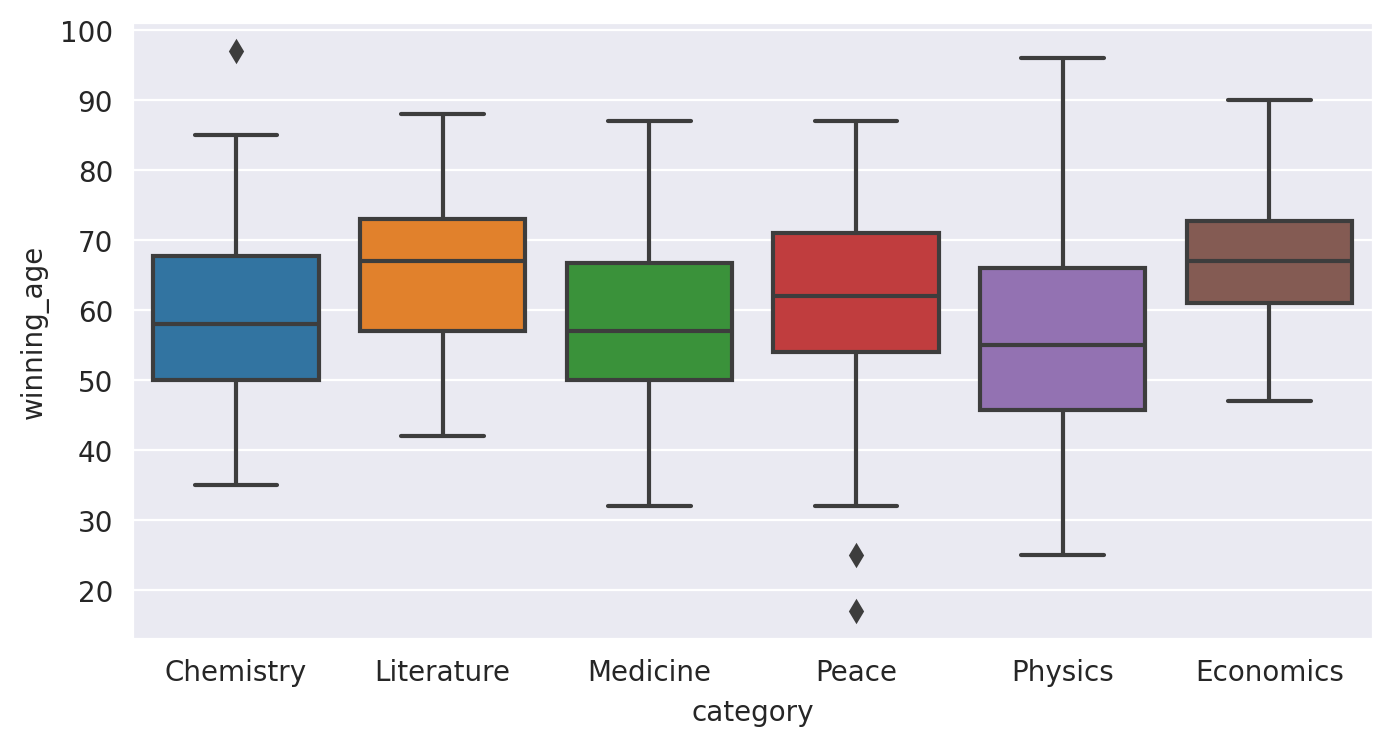

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
    sns.boxplot(data=df,
                x='category',
                y='winning_age',
                # lowess=True, 
                # scatter_kws = {'alpha': 0.4},
                #line_kws={'color': 'black'}#
                )
 
plt.show()

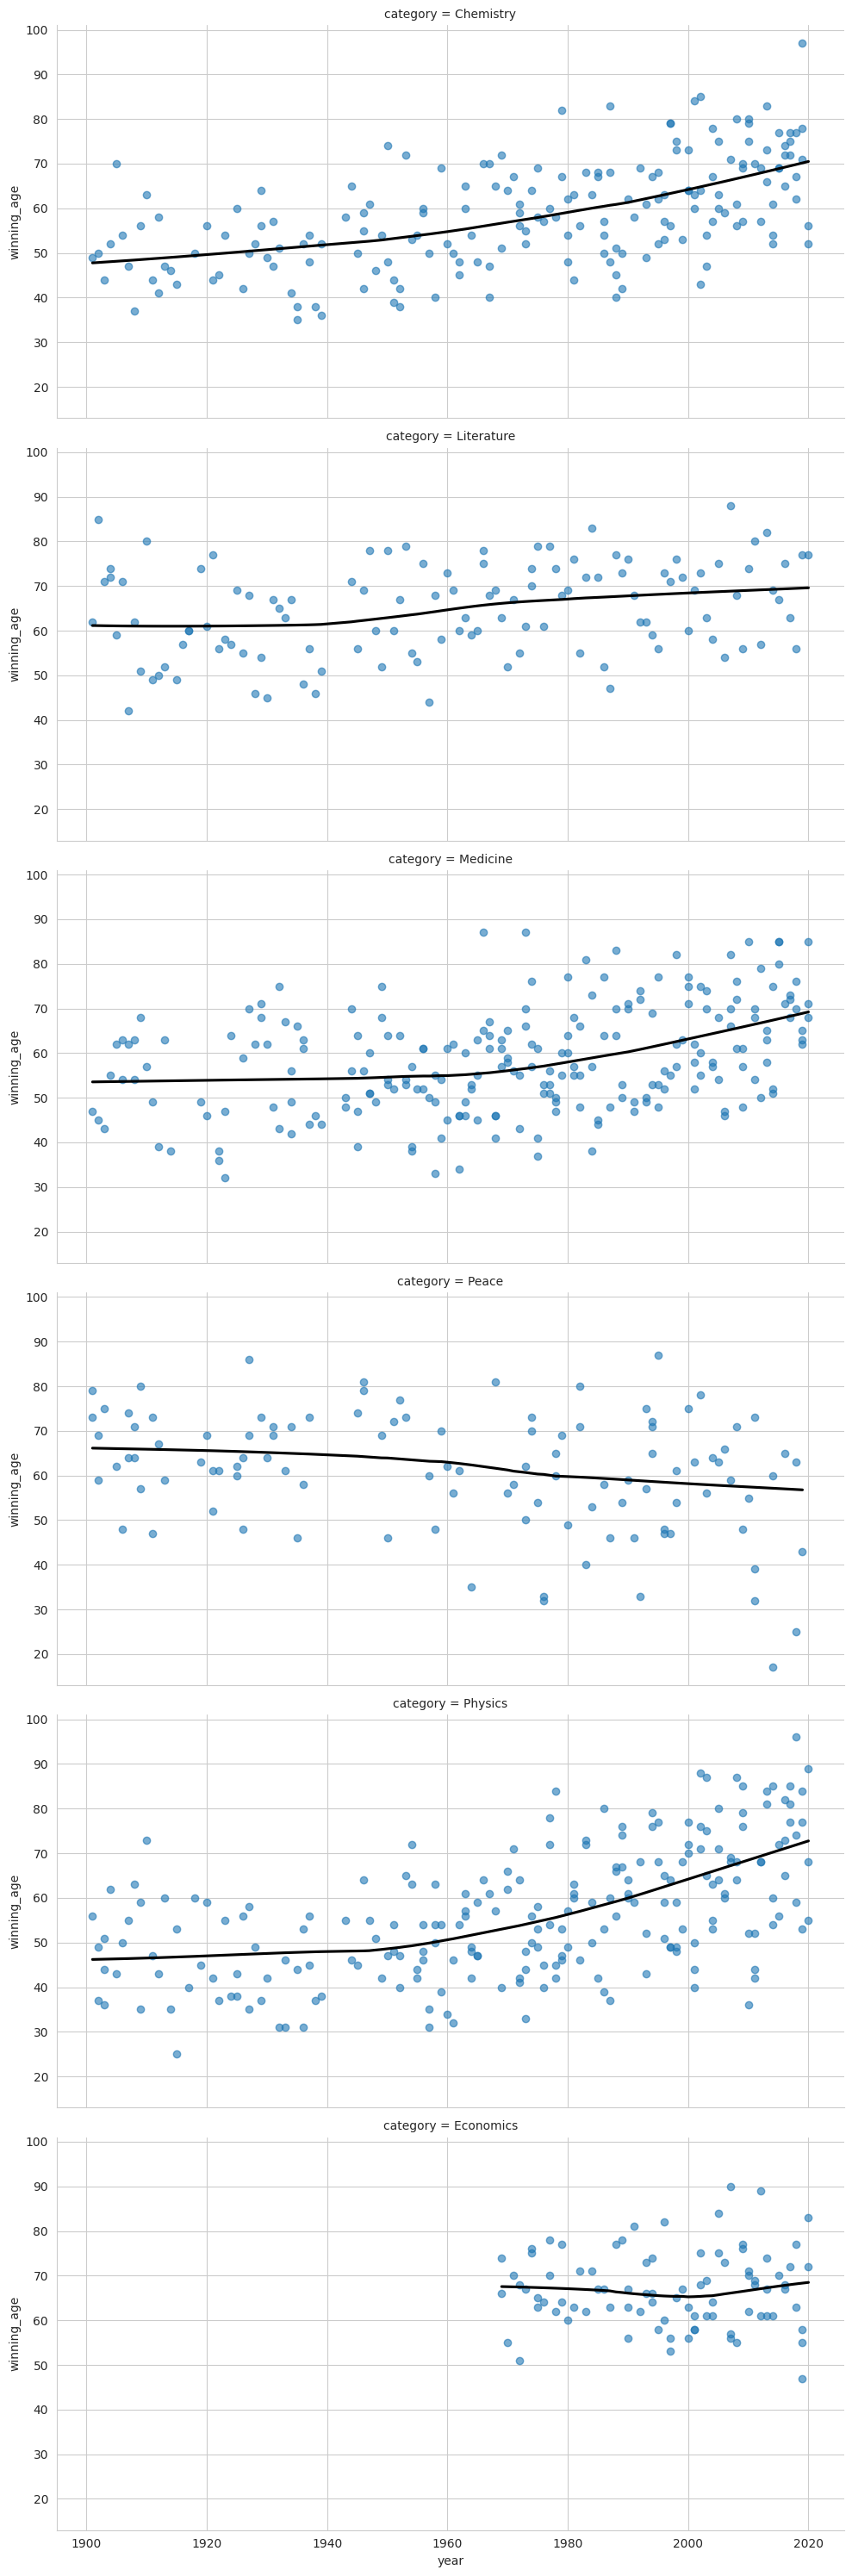

In [ ]:
with sns.axes_style('whitegrid'):
    sns.lmplot(data=df,
               x='year', 
               y='winning_age',
               row = 'category',
               lowess=True, 
               aspect=2,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'black'},)
 
plt.show()

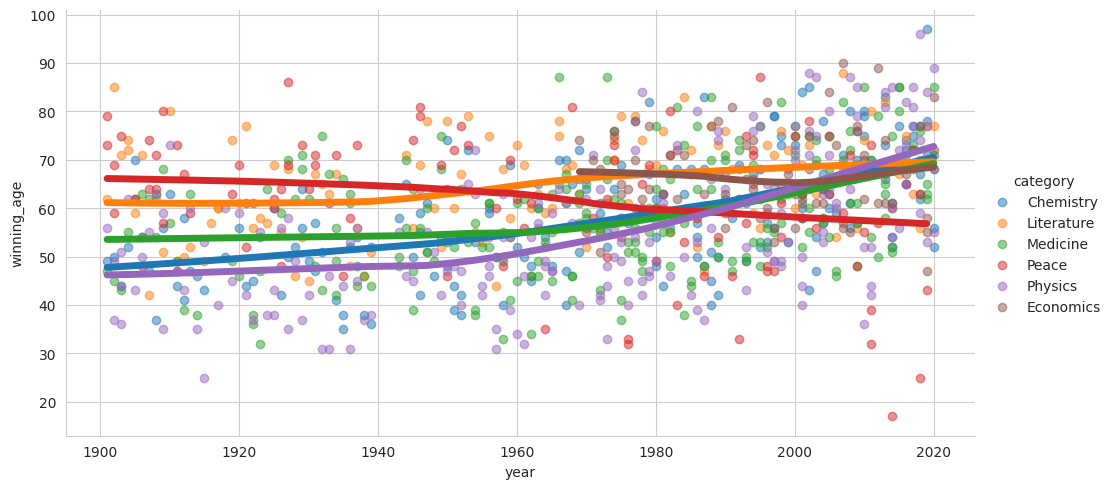

In [ ]:
with sns.axes_style('whitegrid'):
    sns.lmplot(data=df,
               x='year', 
               y='winning_age',
               hue='category',
               lowess=True, 
               aspect=2,
               scatter_kws = {'alpha': 0.5},
               line_kws = {'linewidth': '5'},)
 
plt.show()